In [1]:
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi
rand = np.random.rand
cos = np.cos
sin = np.sin
tanh = np.tanh
sqrt = np.sqrt

(0.0001, 1)

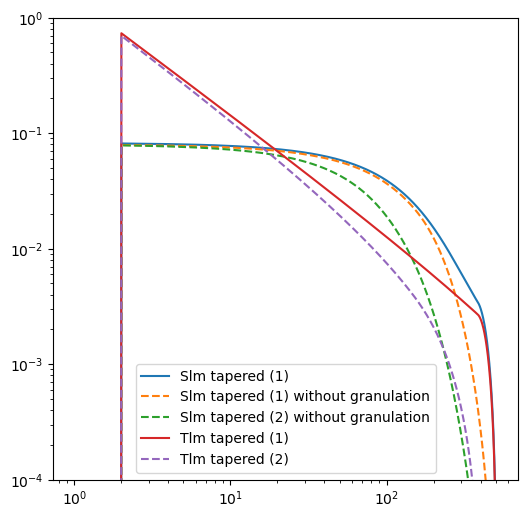

In [44]:
nl = 512
lmax = nl-1

els = np.arange(nl)
ampS = np.zeros([nl])
ampS2 = np.zeros([nl])
ampS3 = np.zeros([nl])
ampT = np.zeros([nl])
ampT2 = np.zeros([nl])
taper1_ampS = np.zeros([nl])
taper2_ampS = np.zeros([nl])
taper3_ampS = np.zeros([nl])
taper1_ampT = np.zeros([nl])
taper2_ampT = np.zeros([nl])
g_l1 = 1000
g_l2 = 100
sg_l1 = 165
sg_l2 = 100
taper_idx1 = 384
taper_idx2 = 150
for l in els[2:]: 
    ampS[l] = 0.08*(1-tanh(l/sg_l1)) + 0.0024*(1 - tanh(l/2000))
    ampS2[l] = 0.08*(1-tanh(l/sg_l1))
    ampS3[l] = 0.08*(1-tanh(l/sg_l2))
    ampT[l] = 1.5*(1 - 0.5*np.sqrt(l/g_l1))/l
    ampT2[l] = 1.5*(1 - 0.5*np.sqrt(l/g_l2))/l
    taper1 = 1
    taper2 = 1
    if l > taper_idx1:
        taper1 = 0.5*(1 + cos(pi*(l - taper_idx1)/(nl - taper_idx1)))
    if l > taper_idx2:
        taper2 = 0.5*(1 + cos(pi*(l - taper_idx2)/(nl - taper_idx2)))
    taper1_ampS[l] = taper1 * ampS[l]
    taper2_ampS[l] = taper2 * ampS2[l]
    taper3_ampS[l] = taper2 * ampS3[l]
    taper1_ampT[l] = taper1 * ampT[l]
    taper2_ampT[l] = taper2 * ampT2[l]
        
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
axs.plot(els, taper1_ampS, label='Slm tapered (1)')
axs.plot(els, taper2_ampS, ls='--', label='Slm tapered (1) without granulation')
axs.plot(els, taper3_ampS, ls='--', label='Slm tapered (2) without granulation')
axs.plot(els, taper1_ampT, label='Tlm tapered (1)')
axs.plot(els, taper2_ampT, ls='--', label='Tlm tapered (2)')
axs.legend()
plt.yscale('log')
plt.xscale('log')
plt.ylim([1e-4, 1])

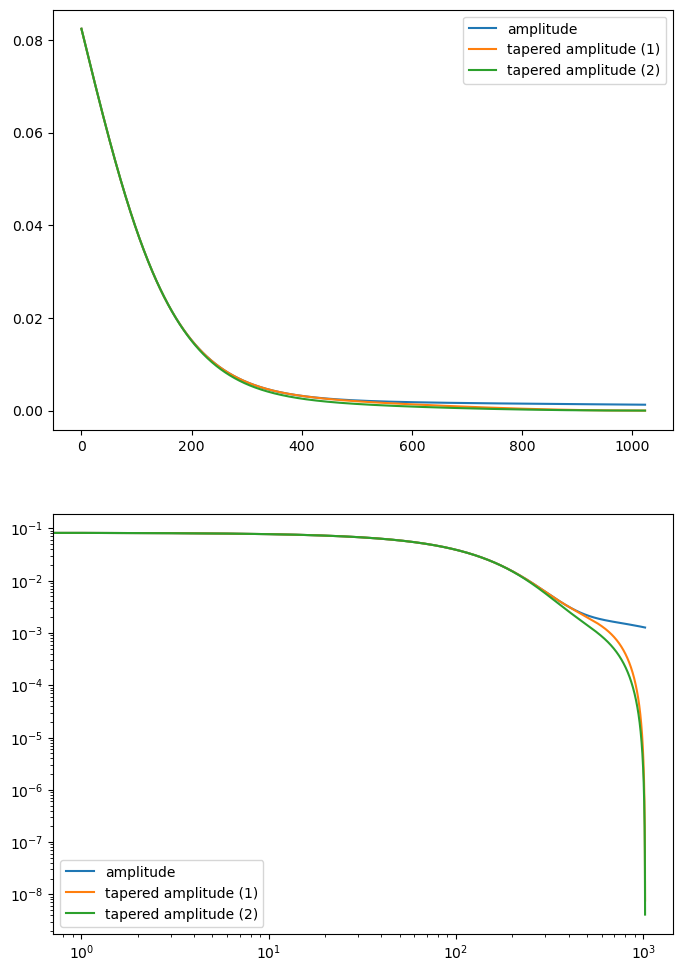

In [11]:
nl = 1024
lmax = nl-1

els = np.arange(nl)
ampS = np.zeros([nl])
ampT = np.zeros([nl])
taper1_ampS = np.zeros([nl])
taper2_ampS = np.zeros([nl])
taper_idx1 = 384
taper_idx2 = 150
for l in els: 
    ampS[l] = 0.08*(1-tanh(l/165)) + 0.0024*(1 - tanh(l/2000))
    taper1 = 1
    taper2 = 1
    if l > taper_idx1:
        taper1 = 0.5*(1 + cos(pi*(l - taper_idx1)/(nl - taper_idx1)))
    if l > taper_idx2:
        taper2 = 0.5*(1 + cos(pi*(l - taper_idx2)/(nl - taper_idx2)))
    taper1_ampS[l] = taper1 * ampS[l]
    taper2_ampS[l] = taper2 * ampS[l]

    
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8,12))
axs.plot(els, ampS, label='amplitude')
axs.plot(els, taper1_ampS, label='tapered amplitude (1)')
axs.plot(els, taper2_ampS, label='tapered amplitude (2)')
axs.legend()
plt.yscale('log')
plt.xscale('log')

In [17]:
els = np.arange(lmax)+1
els

array([   1,    2,    3, ..., 1021, 1022, 1023])

In [34]:
s = np.zeros([nl, nl], dtype=complex)
t = np.zeros([nl, nl], dtype=complex)
savg = np.zeros(nl)

els = np.arange(lmax)+1
taper_idx1 = 384

for l in els:
    l1 = l
    el = float(l)
    amp2 = 0.08*(1-tanh(el/165)) + 0.0024*(1 - tanh(el/2000))
    amp3 = 1.5*(1 - 0.5*sqrt(el/1000))/el
    taper = 1.0
    if l > taper_idx1:
        taper = 0.5*(1 + cos(pi*(l - taper_idx1)/(nl - taper_idx1)))
    amp2 = taper * amp2
    amp3 = taper * amp3
    for m in np.arange(l)+1:
        m1 = m
        phase = 2*pi*rand()
        arg = cos(phase) + 1j*sin(phase)
        randamp = 1.8*rand()
        s[l1, m1] = randamp*amp2*arg
        phase = 2*pi*rand()
        arg = cos(phase) + 1j*sin(phase)
        randamp = 1.8*rand()
        t[l1, m1] = randamp*amp3*arg
    savg[]

(1024,) (1024,)


(1e-07, 0.001)

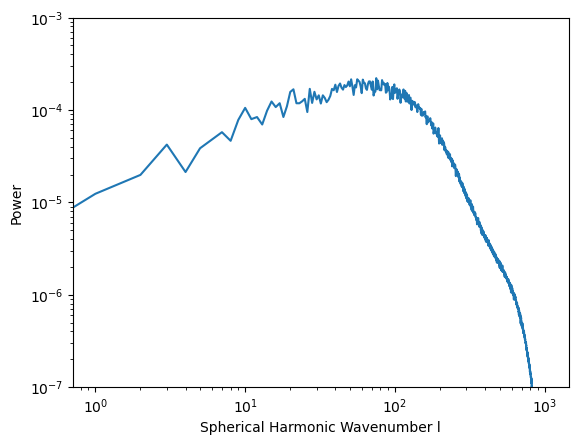

In [64]:
sabs = np.abs(s)**2
tabs = np.abs(t)**2
sabs_l = sabs.mean(axis=1)
tabs_l = tabs.mean(axis=1)
sabs_l1 = sabs[:, 2]
print(sabs_l.shape, tabs_l.shape)

plt.figure()
# plt.plot(els, sabs_l1[1:], label=f'from $S_l^m$ (m=2)')
plt.plot(sabs_l, label=f'from $S_l^m$ (m-averaged)')
plt.xlabel('Spherical Harmonic Wavenumber l')
plt.ylabel('Power')
plt.yscale('log')
plt.xscale('log')
# plt.xlim([0,1000])
plt.ylim([1e-7, 1e-3])

In [114]:
import random as rd
s = np.zeros([nl, nl])
s2 = np.zeros([nl, nl])
els = np.arange(lmax)+1
taper_idx1 = 384

for l in els:
    for m in np.arange(l)+1: 
        s[l, m] = rd.random()#rand()
    s2[l, :] = rand(nl)

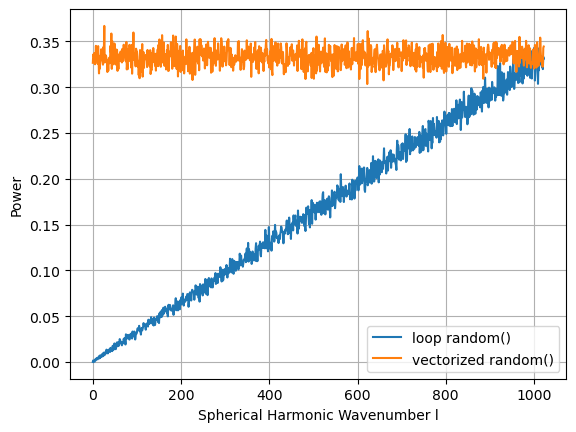

In [115]:
sabs = np.abs(s)**2
sabs2 = np.abs(s2)**2
sabs_l1 = sabs[1:, 2]
sabs_lavg1 = sabs[1:].mean(axis=1)
sabs_labg2 = sabs2[1:].mean(axis=1)


plt.figure()
# plt.plot(sabs_l1, label=f'from $S_l^m$ (m=2)')
plt.plot(sabs_lavg1, label=f'loop random()')
plt.plot(sabs_labg2, label=f'vectorized random()')
plt.xlabel('Spherical Harmonic Wavenumber l')
plt.ylabel('Power')
# plt.yscale('log')
# plt.xscale('log')
plt.legend()
# plt.xlim([0,1000])
# plt.ylim([1e-7, 1e-3])
plt.grid()